In [1]:
#import sys
#sys.path.append("..\\..\\..")

import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from src.helpers.plotters import plot_corr_matrix

In [2]:
df_dropped = pd.read_csv('../cleaned/output_ebay_dropped.csv')
df_dropped.head()

,price_pln,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,327.48,0,1,6,1078,99.9,1,0.736873,0
1,286.38,0,1,6,280,100.0,1,0.692709,0
2,511.71,0,1,6,107,100.0,1,0.660797,0
3,532.18,0,1,6,108,100.0,1,0.661105,0
4,286.58,0,1,6,67,100.0,1,0.645358,0


In [3]:
df_encoded = pd.read_csv('../cleaned/output_ebay_encoded.csv')
df_encoded.head()

,condition,country,model,sale_date,price_pln,producer,model_group,handheld,home_console,generation,seller_num_comments,seller_rating,region,condition_num,seller_score,collectible
0,537.638262,575.592766,435.897022,590.083431,327.48,562.280699,435.897022,0,1,6,1078,99.9,576.733207,1,0.736873,0
1,537.638262,575.592766,435.897022,590.083431,286.38,562.280699,435.897022,0,1,6,280,100.0,576.733207,1,0.692709,0
2,537.638262,575.592766,435.897022,590.083431,511.71,562.280699,435.897022,0,1,6,107,100.0,576.733207,1,0.660797,0
3,537.638262,575.592766,435.897022,590.083431,532.18,562.280699,435.897022,0,1,6,108,100.0,576.733207,1,0.661105,0
4,537.638262,575.592766,435.897022,590.083431,286.58,562.280699,435.897022,0,1,6,67,100.0,576.733207,1,0.645358,0


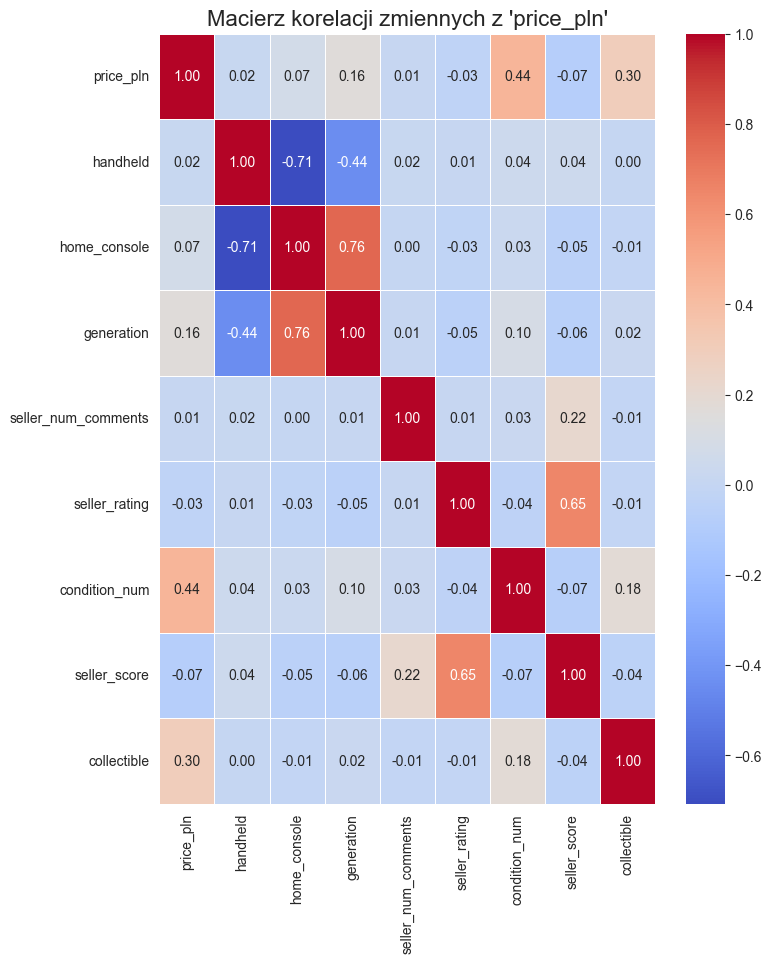

In [4]:
plot_corr_matrix(df_dropped)

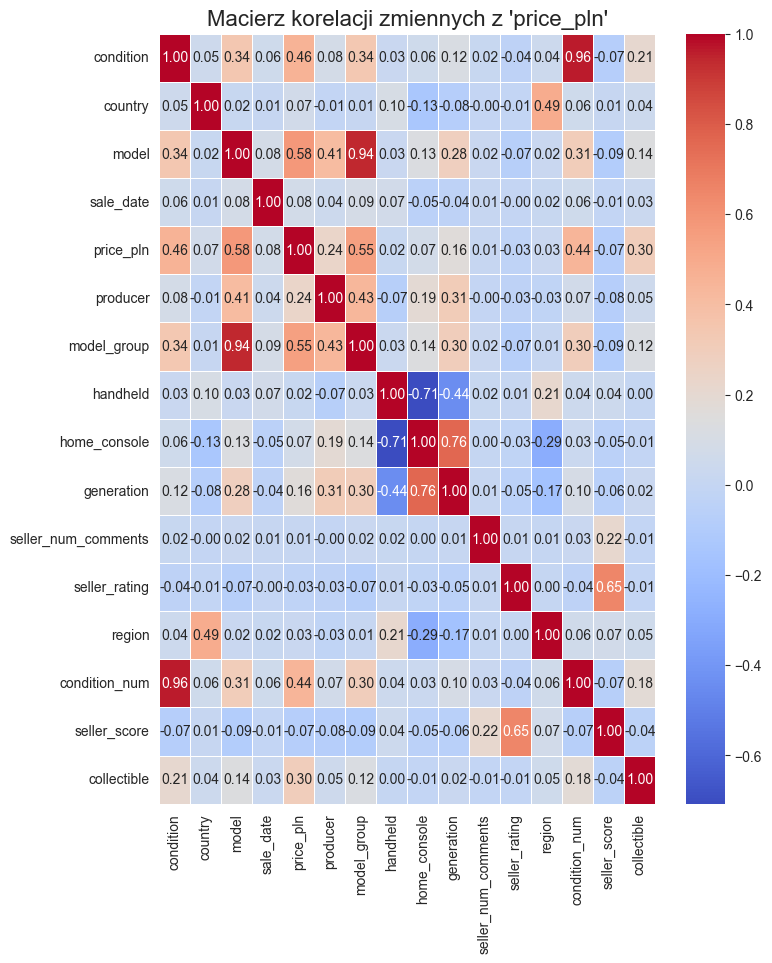

In [5]:
plot_corr_matrix(df_encoded)

In [6]:
y_dropped = df_dropped['price_pln']
X_dropped = df_dropped.drop(columns=['price_pln'])
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)


y_encoded = df_encoded['price_pln']
X_encoded = df_encoded.drop(columns=['price_pln'])
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

X_dropped.head()


,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,0,1,6,1078,99.9,1,0.736873,0
1,0,1,6,280,100.0,1,0.692709,0
2,0,1,6,107,100.0,1,0.660797,0
3,0,1,6,108,100.0,1,0.661105,0
4,0,1,6,67,100.0,1,0.645358,0


In [7]:
ln = LinearRegression()

for i in range(1, df_dropped.shape[1]):
    forward_dropped = SequentialFeatureSelector(
        ln,
        k_features=i,
        forward=True,
        verbose=1
    )
    back_dropped = SequentialFeatureSelector(
        ln,
        k_features=i,
        forward=False,
        verbose=1
    )

    sf_forward_dropped = forward_dropped.fit(X_dropped, y_dropped)
    sf_back_dropped = back_dropped.fit(X_dropped, y_dropped)
    print(str(i) + " forward_k_score " + str(sf_forward_dropped.k_score_) + " backward_k_score " + str(sf_back_dropped.k_score_))
    print(list(sf_forward_dropped.k_feature_names_))
    print(list(sf_forward_dropped.k_feature_names_))

Features: 1/1

1 forward_k_score 0.15972000476692516 backward_k_score 0.15972000476692516
['condition_num']
['condition_num']


Features: 2/2

2 forward_k_score 0.20226246858602243 backward_k_score 0.20226246858602243
['condition_num', 'collectible']
['condition_num', 'collectible']


Features: 3/3

3 forward_k_score 0.21082560470323514 backward_k_score 0.21082560470323514
['generation', 'condition_num', 'collectible']
['generation', 'condition_num', 'collectible']


Features: 4/4

4 forward_k_score 0.2120398399159721 backward_k_score 0.2120398399159721
['handheld', 'generation', 'condition_num', 'collectible']
['handheld', 'generation', 'condition_num', 'collectible']


Features: 5/5

5 forward_k_score 0.21293680817263247 backward_k_score 0.21293680817263247
['handheld', 'generation', 'condition_num', 'seller_score', 'collectible']
['handheld', 'generation', 'condition_num', 'seller_score', 'collectible']


Features: 6/6

6 forward_k_score 0.21326248515917037 backward_k_score 0.21326248515917037
['handheld', 'generation', 'seller_rating', 'condition_num', 'seller_score', 'collectible']
['handheld', 'generation', 'seller_rating', 'condition_num', 'seller_score', 'collectible']


Features: 7/7

7 forward_k_score 0.21333271470044135 backward_k_score 0.21333271470044135
['handheld', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']
['handheld', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']


Features: 8/8

8 forward_k_score 0.20822194081136058 backward_k_score 0.20822194081136058
['handheld', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']
['handheld', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']


In [8]:
for i in range(1, df_encoded.shape[1]):
    forward_encoded = SequentialFeatureSelector(
        ln,
        k_features=i,
        forward=True,
        verbose=1
    )

    back_encoded = SequentialFeatureSelector(
        ln,
        k_features=i,
        forward=False,
        verbose=1
    )
    sf_back_encoded = back_encoded.fit(X_encoded, y_encoded)
    sf_forward_encoded = back_encoded.fit(X_encoded, y_encoded)
    print(str(i) + " forward_k_score " + str(sf_forward_encoded.k_score_) + " backward_k_score " + str(sf_back_encoded.k_score_))
    print(list(sf_forward_encoded.k_feature_names_))
    print(list(sf_back_encoded.k_feature_names_))

Features: 1/11

1 forward_k_score 0.29666592540696674 backward_k_score 0.29666592540696674
['model']
['model']


Features: 2/22

2 forward_k_score 0.3775825106503741 backward_k_score 0.3775825106503741
['model', 'condition_num']
['model', 'condition_num']


Features: 3/33

3 forward_k_score 0.4056296286269367 backward_k_score 0.4056296286269367
['model', 'condition_num', 'collectible']
['model', 'condition_num', 'collectible']


Features: 4/44

4 forward_k_score 0.4066480460866865 backward_k_score 0.4066480460866865
['country', 'model', 'condition_num', 'collectible']
['country', 'model', 'condition_num', 'collectible']


Features: 5/55

5 forward_k_score 0.4071299087249859 backward_k_score 0.4071299087249859
['country', 'model', 'region', 'condition_num', 'collectible']
['country', 'model', 'region', 'condition_num', 'collectible']


Features: 6/66

6 forward_k_score 0.40730788845582744 backward_k_score 0.40730788845582744
['country', 'model', 'seller_rating', 'region', 'condition_num', 'collectible']
['country', 'model', 'seller_rating', 'region', 'condition_num', 'collectible']


Features: 7/77

7 forward_k_score 0.4075766939733489 backward_k_score 0.4075766939733489
['country', 'model', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 8/88

8 forward_k_score 0.40778708404795844 backward_k_score 0.40778708404795844
['country', 'model', 'sale_date', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 9/99

9 forward_k_score 0.4077853319230395 backward_k_score 0.4077853319230395
['country', 'model', 'sale_date', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 10/10

10 forward_k_score 0.4077351110886583 backward_k_score 0.4077351110886583
['country', 'model', 'sale_date', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 11/11

11 forward_k_score 0.4076541365815981 backward_k_score 0.4076541365815981
['country', 'model', 'sale_date', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 12/12

12 forward_k_score 0.4073137895929905 backward_k_score 0.4073137895929905
['country', 'model', 'sale_date', 'producer', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'producer', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 13/13

13 forward_k_score 0.40704003973382774 backward_k_score 0.40704003973382774
['country', 'model', 'sale_date', 'producer', 'model_group', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['country', 'model', 'sale_date', 'producer', 'model_group', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


Features: 14/14

14 forward_k_score 0.4066891213879513 backward_k_score 0.4066891213879513
['condition', 'country', 'model', 'sale_date', 'producer', 'model_group', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['condition', 'country', 'model', 'sale_date', 'producer', 'model_group', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
15 forward_k_score 0.40533092990409775 backward_k_score 0.40533092990409775
['condition', 'country', 'model', 'sale_date', 'producer', 'model_group', 'handheld', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']
['condition', 'country', 'model', 'sale_date', 'producer', 'model_group', 'handheld', 'home_console', 'generation', 'seller_num_comments', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']


In [9]:
import statsmodels.api as sm
regressor_OLS_dropped = sm.OLS(endog=y_train_dropped,exog=X_train_dropped[['handheld', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']]).fit()
regressor_OLS_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.614
Model:                            OLS   Adj. R-squared (uncentered):              0.614
Method:                 Least Squares   F-statistic:                          3.340e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                        0.00
Time:                        19:49:10   Log-Likelihood:                     -1.1280e+06
No. Observations:              146706   AIC:                                  2.256e+06
Df Residuals:                  146699   BIC:                                  2.256e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
handheld               88.1983      3.158     27.926      0.000      82.008      94.388
generation             23.3564      0.384     60.838      0.000      22.604      24.109
seller_num_comments     0.0002   3.39e-05      5.592      0.000       0.000       0.000
seller_rating           3.3461      0.172     19.413      0.000       3.008       3.684
condition_num         325.9745      1.945    167.553      0.000     322.161     329.788
seller_score         -376.2224     22.965    -16.383      0.000    -421.233    -331.212
collectible           703.7931      7.231     97.332      0.000     689.621     717.965
==============================================================================
Omnibus:                   188057.052   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        133462844.915
Skew:                           6.603   Prob(JB):                         0.00
Kurtosis:                     150.170   Cond. No.                     7.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
regressor_OLS_encoded = sm.OLS(endog=y_train_encoded,exog=X_train_encoded[['country', 'model', 'sale_date', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']]).fit()
regressor_OLS_encoded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                          4.518e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                        0.00
Time:                        19:49:13   Log-Likelihood:                     -1.1067e+06
No. Observations:              146706   AIC:                                  2.213e+06
Df Residuals:                  146698   BIC:                                  2.214e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
country           0.9836      0.043     23.066      0.000       0.900       1.067
model             0.8149      0.004    229.975      0.000       0.808       0.822
sale_date         0.1767      0.027      6.549      0.000       0.124       0.230
seller_rating     2.4258      0.210     11.527      0.000       2.013       2.838
region           -1.6388      0.055    -29.550      0.000      -1.747      -1.530
condition_num   223.9187      1.755    127.624      0.000     220.480     227.358
seller_score   -159.0272     19.102     -8.325      0.000    -196.467    -121.587
collectible     578.2019      6.281     92.056      0.000     565.891     590.513
==============================================================================
Omnibus:                   230105.613   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        425670294.120
Skew:                           9.617   Prob(JB):                         0.00
Kurtosis:                     266.185   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
regressor_pred_encoded = regressor_OLS_encoded.predict(X_test_encoded[['country', 'model', 'sale_date', 'seller_rating', 'region', 'condition_num', 'seller_score', 'collectible']])
regressor_pred_dropped = regressor_OLS_dropped.predict(X_test_dropped[['handheld', 'generation', 'seller_num_comments', 'seller_rating', 'condition_num', 'seller_score', 'collectible']])

In [13]:
regressor_pred_encoded

119818    372.542306
125874    336.123532
121080    363.150546
77079     364.531552
74096     324.305296
             ...    
96329     455.528654
26574     418.459679
160419    486.776078
85780     454.677728
64297     334.268899
Length: 36677, dtype: float64

In [14]:
regressor_pred_dropped

119818    440.963114
125874    489.222549
121080    517.758250
77079     600.258405
74096     408.829048
             ...    
96329     478.577379
26574     520.735503
160419    555.587393
85780     527.785362
64297     356.292050
Length: 36677, dtype: float64